## Perkenalan

<b>Name: </b>Rohmad <br/>
<b>Type: </b>Milestone 1 <br/>
<b>Dataset: </b> The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.<br/>
https://www.kaggle.com/aungpyaeap/supermarket-sales <br/>
<b>Objective: </b> 1. Does the difference between member and non-member customers affect gross income? <br/>
2. Does the difference between male and female customers affect gross income?

## Import Module

In [28]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
from numpy import percentile

%matplotlib inline

## Data Loading

In [18]:
df_raw = pd.read_csv('./supermarket_sales.csv')

In [3]:
print(df_raw.shape)
df_raw.head()

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df_raw.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Data Cleaning

##### Rename Column name

In [19]:
df_raw.rename(
    columns={
        'Invoice ID': 'invoice_id',
        'Branch': 'branch',
        'City': 'city',
        'Customer type': 'customer_type',
        'Gender': 'gender',
        'Product line': 'product_line',
        'Unit price': 'unit_price',
        'Quantity': 'qty',
        'Tax 5%': 'tax_5%',
        'Total': 'total',
        'Date': 'date',
        'Time': 'time',
        'Payment': 'payment',
        'gross margin percentage': 'gross_margin_perc',
        'gross income': 'gross_inc',
        'Rating': 'rating'
    }, inplace= True)

In [7]:
df_raw.isna().sum()

invoice_id           0
branch               0
city                 0
customer_type        0
gender               0
product_line         0
unit_price           0
qty                  0
tax_5%               0
total                0
date                 0
time                 0
payment              0
cogs                 0
gross_margin_perc    0
gross_inc            0
rating               0
dtype: int64

#### Adding column and formating date to month

In [20]:
df_raw['month'] = pd.DatetimeIndex(df_raw['date']).month
df_raw['month'] = df_raw['month'].apply(lambda x: calendar.month_abbr[x])
df_raw

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,qty,tax_5%,total,date,time,payment,cogs,gross_margin_perc,gross_inc,rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2


### Preprocessing

##### Display normal distribution or not

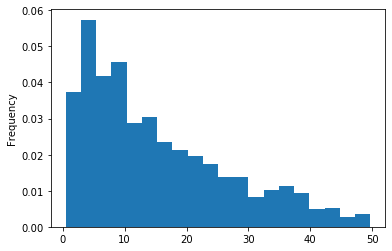

In [8]:
df_raw['gross_inc'].plot.hist(bins=20, density=True)

It can be seen that the distribution is not normal, there is an anomaly in the usd_goal_real, then we will detect for outliers below

### Outlier Detection

##### Finding the observations for each quartile as well as the minimum and maximum observed values from the data sample.

In [9]:
quartiles = np.percentile(df_raw['gross_inc'], [25, 50, 75])
print(quartiles)

[ 5.924875 12.088    22.44525 ]


In [10]:
data_min, data_max = df_raw['gross_inc'].min(), df_raw['gross_inc'].max()
print(data_min)
print(data_max)
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

0.5085
49.65
Min: 0.508
Q1: 5.925
Median: 12.088
Q3: 22.445
Max: 49.650


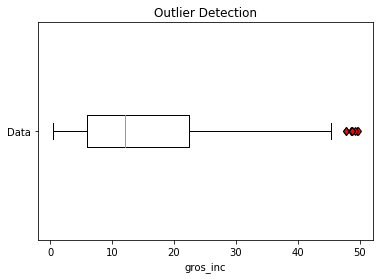

In [11]:
plt.boxplot(df_raw['gross_inc'],
            labels=['Data'],
            showfliers=True,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('gros_inc')
plt.ylabel('')
plt.show()

##### Using Tukey's rule for Outlier Detection
##### q3+1.5∗IQR

In [12]:
out_abv = quartiles[2]+1.5*(quartiles[2]-quartiles[0])
out_abv

47.22581249999999

#### Remove Outlier 1
Remove outlier where usd_real_goal above 47.225

In [29]:
df_filt = df_raw[df_raw['gross_inc'] <= 47.225]
df_filt.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,qty,tax_5%,total,date,time,payment,cogs,gross_margin_perc,gross_inc,rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb


Now the data look better with histogram

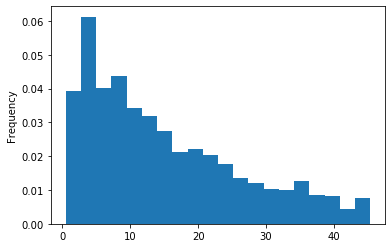

In [14]:
df_filt['gross_inc'].plot.hist(bins=20, density=True)

And also looks better, with boxplot

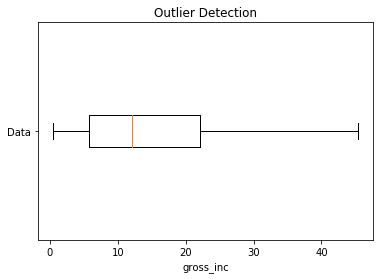

In [15]:
plt.boxplot(df_filt['gross_inc'],
            labels=['Data'],
            showfliers=False,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('gross_inc')
plt.ylabel('')
plt.show()

In [16]:
df_filt.groupby('customer_type').count()

,invoice_id,branch,city,gender,product_line,unit_price,qty,tax_5%,total,date,time,payment,cogs,gross_margin_perc,gross_inc,rating
customer_type,,,,,,,,,,,,,,,,
Member,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
Normal,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493


## Measure of Central Tendency

In [17]:
print(df_filt['gross_inc'].describe())

count    991.000000
mean      15.076417
std       11.319504
min        0.508500
25%        5.817500
50%       12.036000
75%       22.127000
max       45.325000
Name: gross_inc, dtype: float64


#### Measure of Central Tendency Mean

In [18]:
print(df_filt['gross_inc'].mean())

15.076416750756811


#### Measure of Central Tendency Median

In [19]:
print(df_filt['gross_inc'].median())

12.036


#### Measure of Central Tendency Modus

In [20]:
print(df_filt['gross_inc'].mode())

0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
dtype: float64


### Measure of Variance

#### Measure of Variance Range

In [21]:
numcols = ['unit_price','gross_inc']
for col in numcols:
    print(df_filt[col].name + ' range: ' + str(df_filt[col].max() - df_filt[col].min()))

unit_price range: 89.88
gross_inc range: 44.816500000000005


#### Measure of Variance

In [22]:
print(df_filt['gross_inc'].var())

128.13117664078982


#### Measure of Variance Standard Deviation

In [23]:
print(df_filt['gross_inc'].std())

11.319504257730982


#### Display with Plot

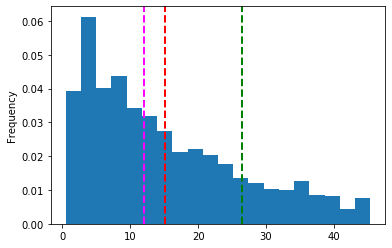

In [24]:
df_filt['gross_inc'].plot.hist(bins=20, density=True)
plt.axvline(df_filt['gross_inc'].describe()['mean'],
            color='red',
            linestyle='dashed',
            linewidth=2)
plt.axvline(df_filt['gross_inc'].describe()['50%'],
            color='magenta',
            linestyle='dashed',
            linewidth=2)
plt.axvline(df_filt['gross_inc'].describe()['mean'] +
            df_filt['gross_inc'].describe()['std'],
            color='green',
            linestyle='dashed',
            linewidth=2)

##### Distribution Fit

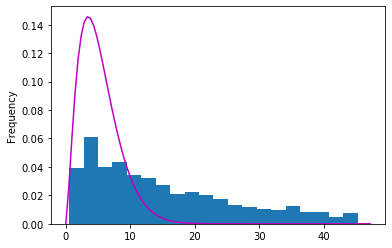

In [25]:
from scipy.stats import beta as beta_fun

fig, ax = plt.subplots(1, 1)
df_filt['gross_inc'].plot.hist(bins=20, density=True)

alpha = 2.5
beta = 20
x = np.linspace(0, 1, 100)
plt.plot(47.225 * x,
         beta_fun.pdf(x, alpha, beta) / 47.225,
         'm-',
         lw=1.5,
         alpha=1,
         label='norm pdf')

x = np.linspace(0, 47.225, 100)
plt.plot(x,
         norm.pdf(x, df_filt['gross_inc'].describe()['mean'],
                  df_filt['gross_inc'].describe()['std']-100),
         'r-',
         lw=1.5,
         alpha=1,
         label='expon pdf')

In [26]:
Exp_value = alpha/(alpha+beta)*47.225
print(Exp_value)

5.247222222222222


#### Confidence Interval

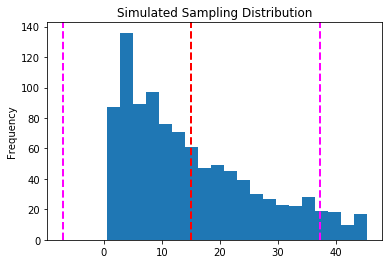

Sampling Mean: 15.076416750756811
Sampling StdErr: 11.319504257730982
95% Confidence Interval: (-7.109403917243709, 37.26223741875733)


In [27]:
means = df_filt['gross_inc']
m = means.mean()
sd = means.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
means.plot.hist(title='Simulated Sampling Distribution', bins=20) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

### Two Sample Test (Member vs Non Member)

##### It was applied to compare whether the mean difference between the two groups was truly significant or whether it was due to random chance. This helps answer questions such as whether member customers have a significant meaning to gross income

In [28]:
df_make_smy=df_filt.groupby('customer_type').agg({'gross_inc':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [29]:
df_make_smy.sort_values('count',ascending=False).head()

,,count,mean
0,Member,498,15.406926
1,Normal,493,14.742556


In [30]:
df_member = df_filt[df_filt['customer_type'] == 'Member']
df_nonmember = df_filt[df_filt['customer_type'] == 'Normal']

c:\users\rohmad\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


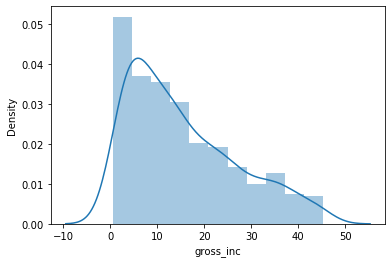

In [31]:
sns.distplot(df_member['gross_inc'])

c:\users\rohmad\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


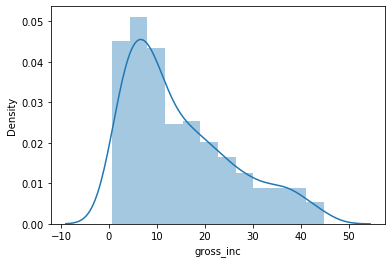

In [32]:
sns.distplot(df_nonmember['gross_inc'])

Member sample mean:15.406925702811243
Member sample std:11.55240693250141
Member Kurtosis:-0.30543442158994694
Non Member sample mean:14.742555780933063
t-statistic:-0.9239383869237462
p-value:0.177872


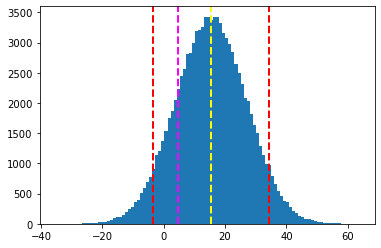

In [33]:
np.random.seed(123)
nonMath =df_member['gross_inc']
math = df_nonmember['gross_inc']
print("Member sample mean:" + str(nonMath.mean()))
print("Member sample std:" + str(nonMath.std()))
print("Member Kurtosis:" + str(nonMath.kurtosis()))
print("Non Member sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### Pengambilan Kesimpulan

The null hypothesis (H0) is that the population mean value for member category customers is less than the population mean value for non-member customers, and the fact that our sample mean for non-member customers is higher than our sample mean for member customers can be described randomly in our sample selection.

The alternative hypothesis (H1) is that the average value of the customer population for the Member category that is closest to the actual goal is greater than the average value for the population of Non-Member customers.

$$
\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}
$$

\begin{equation}\mu_{1}: Member\end{equation} \begin{equation}\mu_{2}: Non Member\end{equation}

This shows that we do not have enough proof to say that Member customers have higher average value than Non Member customers, so we reject our H1 and accept H0

### Two Sample Test (Female vs Male)

##### It was applied to compare whether the mean difference between the two groups was truly significant or whether it was due to random chance. This helps answer questions such as whether gender customers have a significant meaning to gross income

In [34]:
df_make_smy=df_filt.groupby('gender').agg({'gross_inc':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [35]:
df_make_smy.sort_values('count',ascending=False).head()

,,count,mean
1,Male,496,14.594585
0,Female,495,15.559222


In [36]:
df_female = df_filt[df_filt['gender'] == 'Female']
df_male = df_filt[df_filt['gender'] == 'Male']

c:\users\rohmad\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


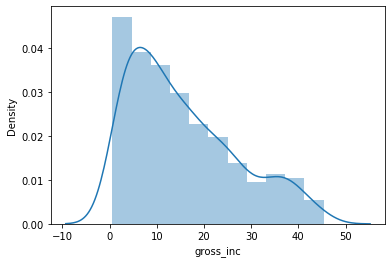

In [37]:
sns.distplot(df_female['gross_inc'])

c:\users\rohmad\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


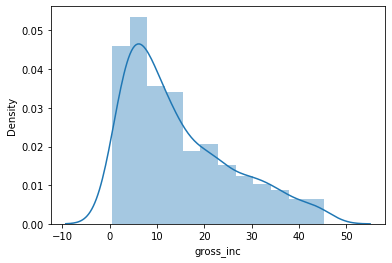

In [38]:
sns.distplot(df_male['gross_inc'])

Female sample mean:15.559222222222221
Female sample std:11.376801908092753
Female Kurtosis:-0.36427773073639935
Male sample mean:14.594584677419356
t-statistic:-1.3418813301589028
p-value:0.089971


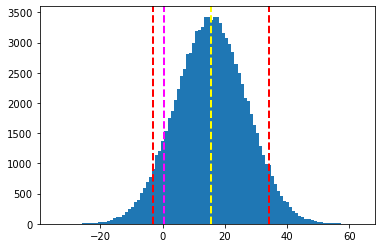

In [39]:
np.random.seed(123)
nonMath =df_female['gross_inc']
math = df_male['gross_inc']
print("Female sample mean:" + str(nonMath.mean()))
print("Female sample std:" + str(nonMath.std()))
print("Female Kurtosis:" + str(nonMath.kurtosis()))
print("Male sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### Pengambilan Kesimpulan

The null hypothesis (H0) is that the population mean value for female customers is less than the population mean value for male customers, and the fact that our sample mean for male customers is higher than our sample mean for female customers can described randomly in our sample selection.

The alternative hypothesis (H1) is that the average value of the Female category customer population that is closest to the actual goal is greater than the average value of the Male customer population.

$$
\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}
$$

\begin{equation}\mu_{1}: Female\end{equation} \begin{equation}\mu_{2}: Male\end{equation}


This shows that we do not have enough proof to say that female customers have higher average value than male customers, so we reject our H1 and accept H0

#### Plotting Gross Income menggunakan Violinplot

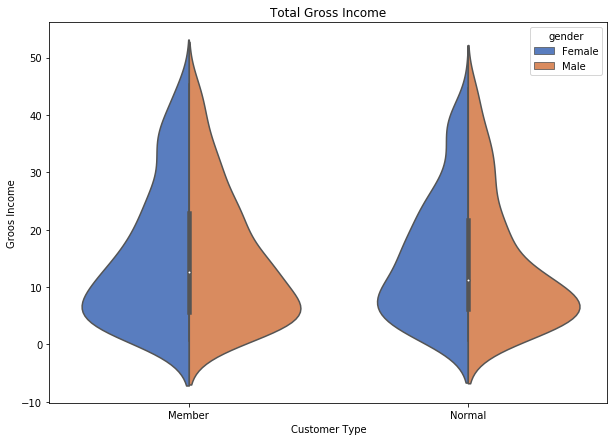

In [40]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='customer_type',
               y='gross_inc',
               hue="gender",
               data=df_filt,
               palette="muted",
               split=True)
plt.xlabel('Customer Type')
plt.ylabel("Groos Income")
plt.title("Total Gross Income")
plt.show()

##### Members and non-members have a similar distribution when viewed based on the gross income of each customer gender group

## Insights

1. Promotions can be done for groups of members and non-members of each gender because they have the same distribution.
2. If you want to increase the number of members, there are still many normal customers (non-members) that can be influenced.

#### Convert Data Frame to CSV for Data Dashboard

In [30]:
df_filt.to_csv('supermarket_sales_clean.csv', index=False)